### Mohammed Tabarak Ahmed(Tabss)

# 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Load dataset

In [25]:
df = pd.read_csv("C:/Users/TABARAK/Downloads/archive/apps.csv")

# Quick look
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


# 3. Data Cleaning

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [11]:
# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [13]:
# Clean Price column
df['Price'] = df['Price'].str.replace('$', '', regex=True)   # remove $
df['Price'] = df['Price'].replace('Free', '0')               # replace 'Free' with 0
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')    # convert to float, invalids -> NaN
df['Price'] = df['Price'].fillna(0)                          # fill NaN with 0

In [14]:
# Handle missing values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df['Android Ver'] = df['Android Ver'].fillna('Unknown')

# 4. Create KPIs

In [ ]:
total_apps = df['App'].nunique()
avg_rating = df['Rating'].mean()
total_installs = df['Installs'].sum()
paid_apps = df[df['Type'] == 'Paid'].shape[0]
free_apps = df[df['Type'] == 'Free'].shape[0]

print("Total Unique Apps:", total_apps)
print("Average Rating:", round(avg_rating, 2))
print("Total Installs:", total_installs)
print("Free Apps:", free_apps, "| Paid Apps:", paid_apps)


Total Unique Apps: 9659
Average Rating: 3.54
Total Installs: 75122937527
Free Apps: 8903 | Paid Apps: 756


# 5. Aggregations

In [ ]:
# Installs by Category
installs_by_category = df.groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)
print(installs_by_category.head())

         Category     Installs
14           GAME  13878924415
6   COMMUNICATION  11038276251
29          TOOLS   8001771915
25   PRODUCTIVITY   5793091369
27         SOCIAL   5487867902


In [17]:
# Average Rating by Category
rating_by_category = df.groupby('Category')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
print(rating_by_category.head())

          Category    Rating
8        EDUCATION  4.327731
0   ART_AND_DESIGN  4.153125
9    ENTERTAINMENT  4.135294
14            GAME  4.039208
5           COMICS  4.032143


In [18]:
# Revenue estimation (Price * Installs) for Paid apps
df['Revenue_Estimate'] = df['Price'] * df['Installs']
top_revenue_apps = df[['App', 'Revenue_Estimate']].sort_values(by='Revenue_Estimate', ascending=False).head(10)
print(top_revenue_apps)

                                                 App  Revenue_Estimate
0     Photo Editor & Candy Camera & Grid & ScrapBook               0.0
6433                                      Tic Tac CK               0.0
6435                                       INFAMY RO               0.0
6436                                     CK Call NEW               0.0
6437                                         Ck Coif               0.0
6438                        CONTRACT KILLER: ZOMBIES               0.0
6439                                         CK Shop               0.0
6440                                        FlexBook               0.0
6441                                 Can Knockdown 3               0.0
6442                   Fu*** Weather (Funny Weather)               0.0


# 6. Visualizations


In [ ]:
# Installs by Category
fig = px.bar(installs_by_category.head(10), x='Category', y='Installs',
             title="Top 10 Categories by Installs", text='Installs')
fig.show()

In [20]:
# Average Rating by Category
fig = px.bar(rating_by_category.head(10), x='Category', y='Rating',
             title="Top 10 Categories by Average Rating", text='Rating')
fig.show()

In [21]:
# Top 10 Revenue Generating Apps
fig = px.bar(top_revenue_apps, x='App', y='Revenue_Estimate',
             title="Top 10 Revenue Generating Apps", text='Revenue_Estimate')
fig.show()

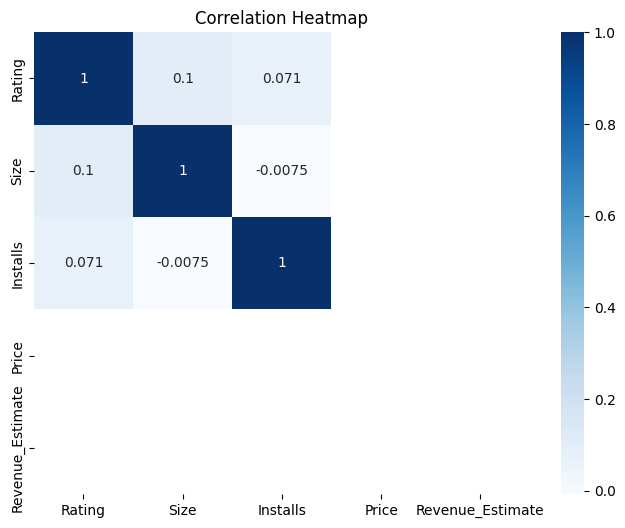

In [22]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Rating','Size','Installs','Price','Revenue_Estimate']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# 7. Insights (print statements for clarity)

In [23]:
print("\n--- Insights ---")
print(f"Highest installs category: {installs_by_category.iloc[0]['Category']}")
print(f"Highest rated category: {rating_by_category.iloc[0]['Category']}")
print(f"Top revenue potential app: {top_revenue_apps.iloc[0]['App']}")



--- Insights ---
Highest installs category: GAME
Highest rated category: EDUCATION
Top revenue potential app: Photo Editor & Candy Camera & Grid & ScrapBook
